# Programming Exercise 3: Multi-class Classification and Neural Networks

## 1. Data loading and visualization

In [1]:
import scipy.io as sio
data = sio.loadmat('ex3data1.mat')

In [2]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

### 1.1 What is X (training dataset)?

> There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image. (c) Andrew N.G.

In [3]:
X = data['X']

In [4]:
type(X)

numpy.ndarray

In [5]:
X.shape

(5000, 400)

In [6]:
X[1].shape #one image

(400,)

### 1.2 What is Y (labels)?

> The second part of the training set is a 5000-dimensional vector y that
contains labels for the training set. To make things more compatible with
Octave/MATLAB indexing, where there is no zero index, we have mapped
the digit zero to the value ten. Therefore, a “0” digit is labeled as “10”, while
the digits “1” to “9” are labeled as “1” to “9” in their natural order. (c) Andrew N.G.

In [7]:
Y = data['y']

In [8]:
Y.shape

(5000, 1)

In [9]:
Y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [10]:
Y[1]

array([10], dtype=uint8)

In [11]:
Y[Y == 10].shape

(500,)

    For every digit from '0' to '9' there are 500 samples.

> set the zero digit to 0, rather than its mapped 10 in this dataset
This is an artifact due to the fact that this dataset was used in 
MATLAB where there is no index 0 (c) dibgerge on GitHun

In [12]:
#Y[Y == 10] = 0

In [13]:
Y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

### 1.3 Visualization

In [14]:
import specialFuncs

In [15]:
#randomly choose 10 samples from dataset to display
import numpy as np

In [16]:
#number of samples 
m = 5000

In order to choose random samples (in our case 12) from the given dataset (5000), it has been used numpy function called np.random.choice.
    - m - from what we choose (0 to 5000)
    - size - how many samples we need
    - replace - the chosen sample will not be taken repeatedly

In [17]:
rand_choices = np.random.choice(m, size = 100, replace = True)

In [18]:
rand_choices

array([4962,  544, 2152, 1395,  993, 3456, 1734, 1773, 4588, 1008, 1853,
       3827, 1271, 2299,  184, 1063,  765, 2022, 4181, 3406, 1001, 2459,
       3713, 4408, 4261, 1993, 4254, 4999, 4568,  127, 2184, 2945, 1913,
        394, 2175, 2009, 1813, 4060, 4621, 4729, 4635,  283,  978, 3433,
       3072, 3349, 4025, 2442,   96,  899,  939, 1368,  588, 2442,  892,
       3159, 3770, 2720,  526, 4986, 2532, 4390, 1359, 4611, 3304, 2817,
       2193, 3063,   46, 3605, 3783, 1637,  640,  952, 3734, 3606,  964,
       3263, 4602, 4080,  910, 2565, 2772, 2627, 1530,  444, 1849, 3594,
       4710, 4406, 2939, 2354, 2721, 2805,  916, 4878, 2625, 2546, 1396,
       1455])

In [19]:
X.shape

(5000, 400)

In [20]:
X_rand_choices = X[rand_choices,:]

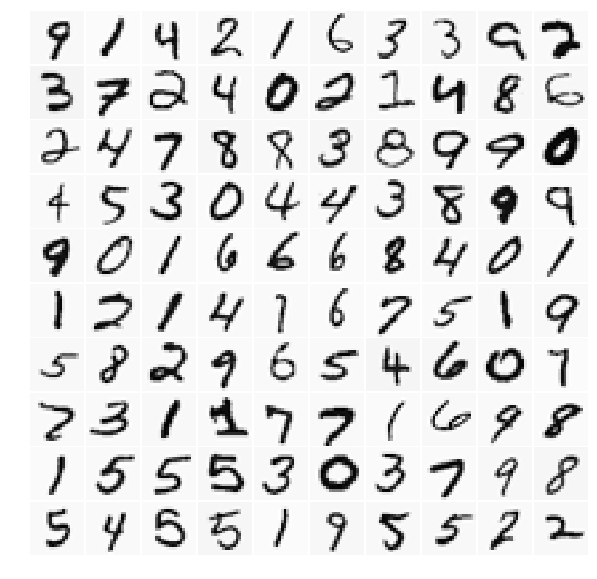

In [21]:
specialFuncs.displayData(X_rand_choices)

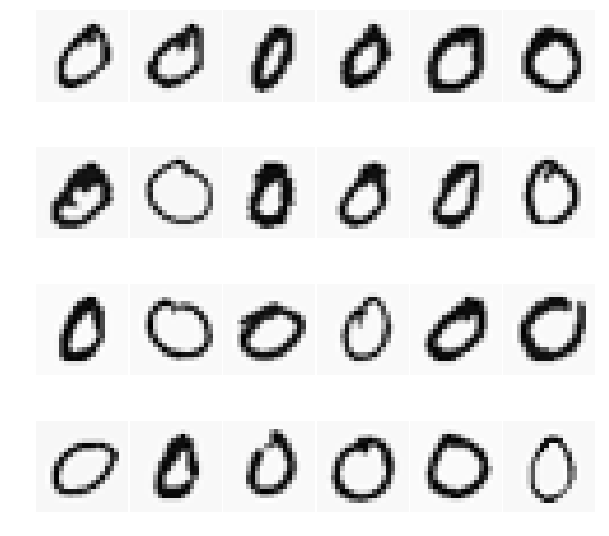

In [22]:
#Visualizing first 10 elements

first_ten_list = list(range(24))
X_first_ten = X[first_ten_list, :]
specialFuncs.displayData(X_first_ten)

### 1.4 Loading weights (Ha-Ha-Ha-Ha-Ha)

        As it has been appeared, the weights have been already found and given in the initial package. While, we have been spending hours to figure out how to train when 'backpropagation' was not explained yet.

In [23]:
Theta = sio.loadmat('ex3weights.mat')

In [24]:
Theta

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [25]:
Theta1, Theta2 = Theta['Theta1'], Theta['Theta2']

In [26]:
Theta1.shape

(25, 401)

In [27]:
Theta2.shape

(10, 26)

## 2. Implementation

### 2.1 Neural Network Architecture

    Shapes:
     - X.shape = (5000, 400)
     - Y.shape = (5000, 1)
     - Theta1.shape = (25, 401)
     - Theta2.shape = (10, 26)

> Since Theta.shape defines the number of neurons in succeeding layer by formulae s(j+1) x (s(j)+1), it can visualized the architecture of Neural Network:

<img src="neuralnetwork.png">

### 2.2 Feed Forward

        Before moving on it is important to augment X (add '1' (bias) to the input data):

In [28]:
X_aug = np.insert(X, 0, 1, axis = 1) #Augmneted with one X

In [29]:
X_aug

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_aug.shape

(5000, 401)

        Implementation first of z1 = Theta1 * X and a2 = sigmoid(z1):

In [31]:
#My simple library for basic functions (sigmoid, cost, GDS):
import basicFuncs as bf

In [32]:
a2 = bf.sigmoid(X_aug, Theta1.T)

        Implementation of z2 = Theta2 * a2 and output = h = sigmoid(z2):

In [33]:
a2.shape

(5000, 25)

        As it can be seen, it is necessary to add bias again to a2:

In [34]:
a2_aug = np.insert(a2, 0, 1, axis = 1)

In [35]:
a2_aug.shape

(5000, 26)

In [36]:
h = bf.sigmoid(a2_aug, Theta2.T)

In [37]:
h.shape

(5000, 10)

In [38]:
h[0]

array([1.12661530e-04, 1.74127856e-03, 2.52696959e-03, 1.84032321e-05,
       9.36263860e-03, 3.99270267e-03, 5.51517524e-03, 4.01468105e-04,
       6.48072305e-03, 9.95734012e-01])

## 3. Results

In [39]:
np.set_printoptions(suppress=True)

In [40]:
h[0]

array([0.00011266, 0.00174128, 0.00252697, 0.0000184 , 0.00936264,
       0.0039927 , 0.00551518, 0.00040147, 0.00648072, 0.99573401])

In [41]:
ho = []
for i in range(5000):
    each = h[i]
    maxi = 0.0
    ind = 0
    for j in range(10):
        if each[j] > maxi:
            maxi = each[j]
            ind = j
    ho.append(ind + 1)

In [42]:
ho

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 8,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 

In [43]:
import matplotlib.pyplot as plt

Text(0.5,1,'The Distribution of the outputs from 1 to 10')

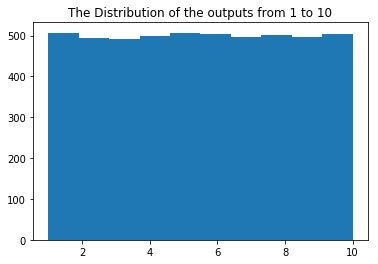

In [44]:
plt.hist(ho)
plt.title('The Distribution of the outputs from 1 to 10')

In [45]:
hon = np.array([ho])

In [46]:
hon.shape

(1, 5000)

In [47]:
hon

array([[10, 10, 10, ...,  9,  9,  9]])

In [48]:
np.mean(hon.T == Y) * 100

97.52

## 4. Discussion

The most important problem was in encoding of the labels. For example, sample hypothesis is
* h[0] = array([0.00011266, 0.00174128, 0.00252697, 0.0000184 , 0.00936264, 0.0039927 , 0.00551518, 0.00040147, 0.00648072, 0.99573401])
for the input with actual of 'zero' image.

In Octave, it has been placed label of 'zero' as the last neuron in the output layer. As it has been seen before the values of Y starts from not 0, but 1 and ends with 10.